In [2]:
from histogram_plotter import HistPlotter
from sklearn.preprocessing import StandardScaler

import data_frame
import models
from utils import load_config, load_model

config_path = "configs/config.yml"
config = load_config(config_path)

filePath = "../KiDS-DR5-WCScut_x_DESI-DR1-small.fits"

df = data_frame.DataFrame(filePath, "QSO", data_frame.MaxFiller())
X_train, y_train = df.get_train_dataset()

X_test_NM, y_test_NM = df.data.loc[(df.data["split"]=="test") & (~df.data["has_missing"]) & (~df.data["faint"]), df.features], df.data.loc[(df.data["split"]=="test") & (~df.data["has_missing"]) & (~df.data["faint"]), "Z"]
X_test_OM, y_test_OM = df.data.loc[(df.data["split"]=="test") & (df.data["has_missing"]) & (~df.data["faint"]), df.features], df.data.loc[(df.data["split"]=="test") & (df.data["has_missing"]) & (~df.data["faint"]), "Z"]
X_faint_NM, y_faint_NM = df.data.loc[(df.data["split"]=="test") & (~df.data["has_missing"]) & (df.data["faint"]), df.features], df.data.loc[(df.data["split"]=="test") & (~df.data["has_missing"]) & (df.data["faint"]), "Z"]
X_faint_OM, y_faint_OM = df.data.loc[(df.data["split"]=="test") & (df.data["has_missing"]) & (df.data["faint"]), df.features], df.data.loc[(df.data["split"]=="test") & (df.data["has_missing"]) & (df.data["faint"]), "Z"]

scaler = StandardScaler()
scaler.fit(X_train)

X_test_NM = scaler.transform(X_test_NM)
X_test_OM = scaler.transform(X_test_OM)
X_faint_NM = scaler.transform(X_faint_NM)
X_faint_OM = scaler.transform(X_faint_OM)

modelPath = f"../models/experiment2/MG_{config["num_components"]}_components_3/variables/variables"
model = load_model(modelPath, models.MixtureGaussian, df, config)

2025-10-06 10:56:09.819794: E tensorflow/core/util/util.cc:131] oneDNN supports DT_INT32 only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


Chi^2: 10349.258680875611


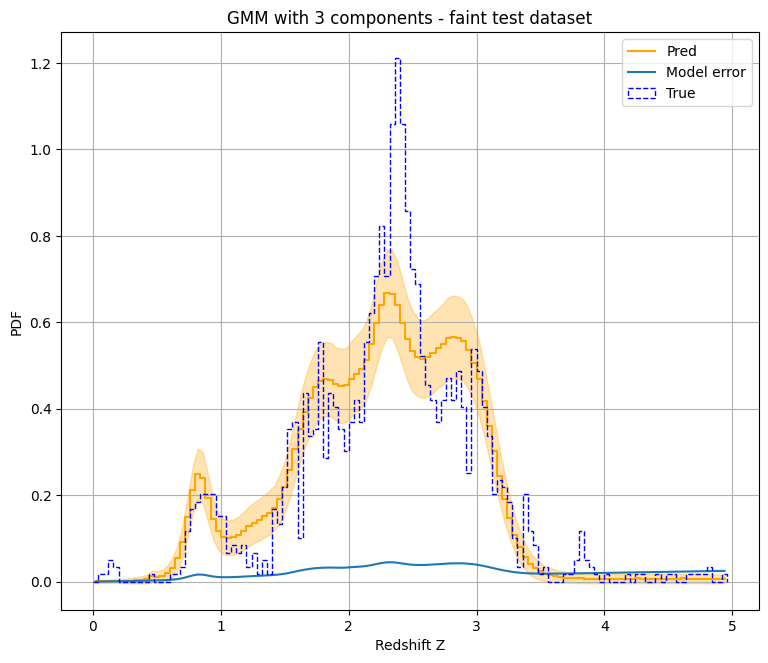

In [3]:
histPlotter = HistPlotter(X_faint_OM, y_faint_OM, "faint", model, "GMM")
histPlotter.evaluate_model()